In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
coffee_production = pd.read_csv("../data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [4]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [5]:
axes_settings = {}

plt.rc("axes", **axes_settings)

### Data Prep

In [7]:
brazil_vs_others = pd.DataFrame(coffee_production['Brazil'])
brazil_vs_others.index.name = 'Year'

brazil_vs_others['Rest of World'] = coffee_production.drop('Brazil', axis= 1).sum(axis = 1).astype('float64')
brazil_vs_others = brazil_vs_others.apply(pd.to_numeric)
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [51]:
coffee_production_top5_2018 = pd.DataFrame(coffee_production.loc['2018']).sort_values('2018', ascending = False)
RoW = coffee_production_top5_2018[5:].sum()
coffee_production_top5_2018 = coffee_production_top5_2018.head()
coffee_production_top5_2018.loc['Rest of World'] = RoW
coffee_production_top5_2018

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


In [148]:
coffee_production_top5_all = pd.DataFrame(coffee_production.sum().sort_values(ascending = False))
RoW_all = coffee_production_top5_all[5:].sum()
coffee_production_top5_all = coffee_production_top5_all.head()
coffee_production_top5_all.loc['Rest of World'] = RoW_all
coffee_production_top5_all.rename(columns = {0: 'total'})
coffee_production_top5_all = coffee_production_top5_all.rename(columns = {0: 'total'})
coffee_production_top5_all

,total
total_production,
Brazil,1190965.7353
Viet Nam,439540.9519
Colombia,345871.4464
Indonesia,245116.7707
Ethiopia,141542.8931
Rest of World,1225391.5436


In [ ]:
target_1990 = [coffee_production.loc['1990'].sum(), coffee_production.loc['1990']['Brazil']]
brazil_percentage_1990 = round((coffee_production.loc['1990']['Brazil']/coffee_production.loc['1990'].sum())*100, 2)
target_2018 = [coffee_production.loc['2018'].sum(), coffee_production.loc['2018']['Brazil']]
brazil_percentage_2018 = round((coffee_production.loc['2018']['Brazil']/coffee_production.loc['2018'].sum())*100, 2)

In [187]:
colors = ['Green', 'red', 'yellow', 'indianred', 'lime', 'grey']

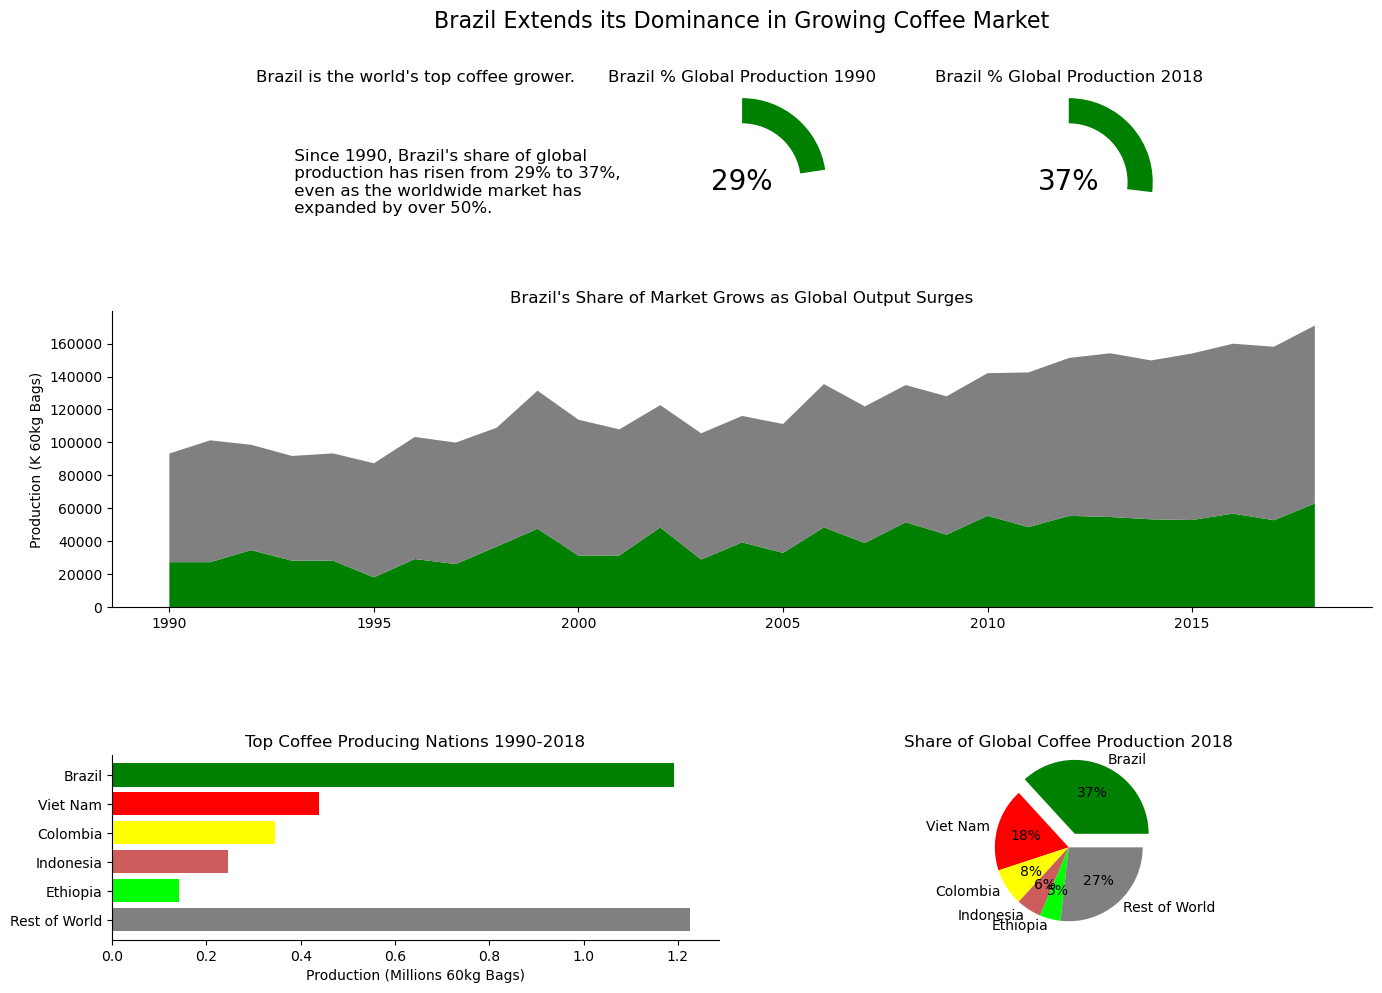

In [212]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14, 10))
fig.suptitle('Brazil Extends its Dominance in Growing Coffee Market', fontsize=16)

grid = GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[0:2, 1:3])
text = (
    " Since 1990, Brazil's share of global\n production has risen from 29% to 37%,\n "
    "even as the worldwide market has\n expanded by over 50%."
)
ax1.text(0.05, 0.5, text, wrap=True, ha='left', va='center', fontsize=12)
donut = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)
ax1.set_title("Brazil is the world's top coffee grower.")
ax1.axis('off')

ax2 = fig.add_subplot(grid[0:2, 3:5])
ax2.pie(
    x=target_1990,
    startangle=90,
    labels=['', ''],
    autopct='',
    colors=['white', 'green'],
)
ax2.text(0, 0, f'{brazil_percentage_1990:.0f}%', color='black', fontsize=20, ha='center', va='center')
donut = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)
ax2.set_title('Brazil % Global Production 1990')
ax2.axis('equal')

ax3 = fig.add_subplot(grid[0:2, 5:7])
ax3.pie(
    x=target_2018,
    startangle=90,
    labels=['', ''],
    autopct='',
    colors=['white', 'green'],
)
ax3.text(0, 0, f'{brazil_percentage_2018:.0f}%', color='black', fontsize=20, ha='center', va='center')
donut = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)
ax3.set_title('Brazil % Global Production 2018')
ax3.axis('equal')

ax4 = fig.add_subplot(grid[2:5, 0:])
ax4.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['Rest of World'],
    colors=['green', 'grey']
)
ax4.set_title("Brazil's Share of Market Grows as Global Output Surges")
ax4.set_ylabel('Production (K 60kg Bags)')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.xaxis.set_major_locator(plt.MaxNLocator(7))

ax5 = fig.add_subplot(grid[6:8, 0:4])
ax5.barh(
    coffee_production_top5_all.index,
    coffee_production_top5_all['total'] / 1_000_000,
    color=colors
)
ax5.set_title('Top Coffee Producing Nations 1990-2018')
ax5.set_xlabel('Production (Millions 60kg Bags)')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.invert_yaxis()

ax6 = fig.add_subplot(grid[6:8, 4:8])
ax6.pie(
    x=coffee_production_top5_2018['2018'],
    labels=coffee_production_top5_2018.index,
    colors=colors,
    explode=[0.2, 0, 0, 0, 0, 0],
    autopct='%0.f%%',
)
ax6.set_title('Share of Global Coffee Production 2018')

plt.subplots_adjust(wspace=0.4, hspace=0.5, left=0.05, right=0.95, top=0.9, bottom=0.05)

plt.show()


### Meshgrid Layout

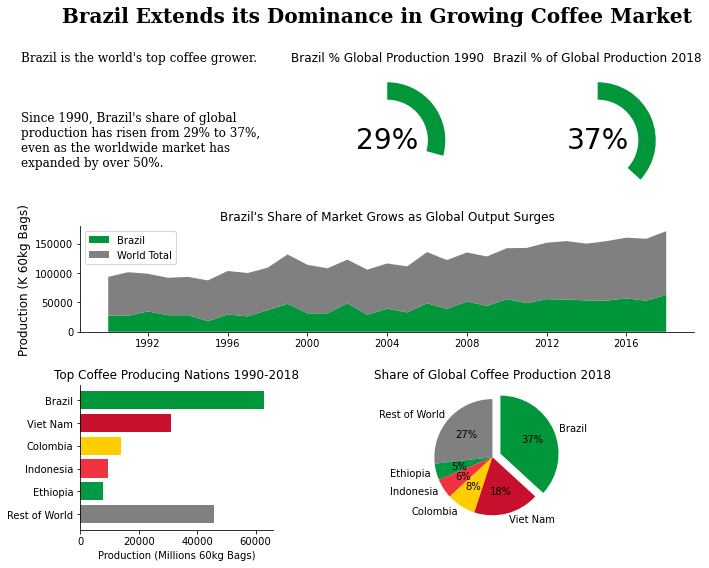

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [213]:
prices_paid_to_growers = pd.read_csv("../data/coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [214]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


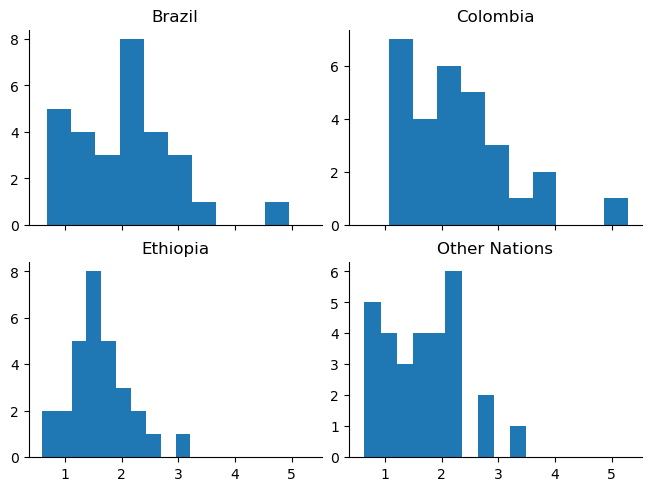

In [224]:
fig, ax = plt.subplots(2, 2, constrained_layout = True, sharex =True)

ax[0][0].hist(prices_paid_to_growers['Brazil'])
ax[0][0].set_title('Brazil')
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][1].hist(prices_paid_to_growers['Colombia'])
ax[0][1].set_title('Colombia')
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)

ax[1][0].hist(prices_paid_to_growers['Ethiopia'])
ax[1][0].set_title('Ethiopia')
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)

ax[1][1].hist(prices_paid_to_growers['Other Nations'])
ax[1][1].set_title('Other Nations')
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)


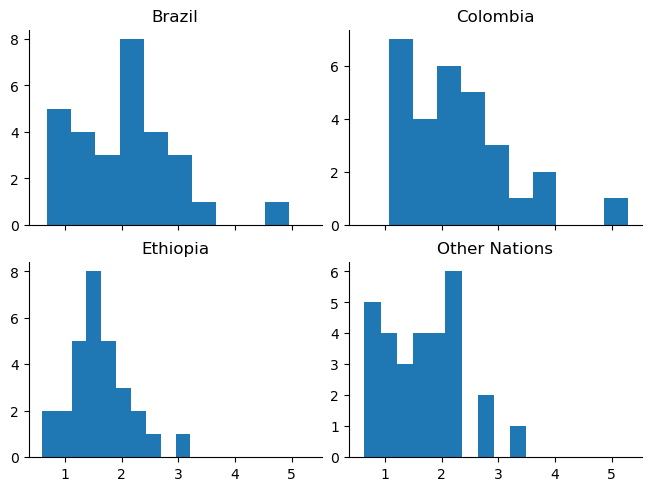